In [1]:
%matplotlib notebook
%load_ext autoreload

In [2]:
import sys, os
os.environ['PKG_CONFIG_PATH'] = '/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/pkgconfig'

import numpy as np
import xarray as xr

sys.path.append('..')
import project

Loading ../data/phantom_lung_1000/phantom4/phantom4_anat.nii.gz
Loading ../data/phantom_lung_1000/phantom4/phantom4_elast.nii.gz
Loading ../data/phantom_lung_1000/phantom4/phantom4_disp.nii.gz
Loading ../data/phantom_lung_1000/phantom4/phantom4_mask.nii.gz
Loading ../data/phantom_lung_1000/phantom4/phantom4_mesh10.xdmf
Loading ../data/phantom_lung_1000/phantom4/phantom4_mesh10.xdmf... 5111
CT


<IPython.core.display.Javascript object>


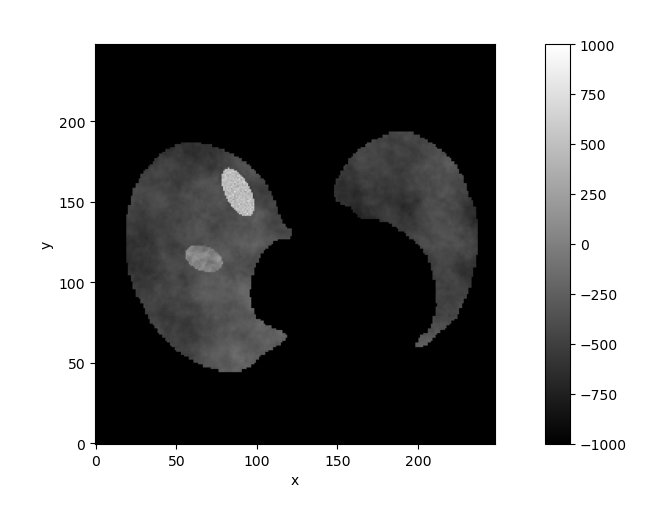

interactive(children=(SelectionSlider(description='z', options=((0.0, 0), (2.5, 1), (5.0, 2), (7.5, 3), (10.0,…

elasticity


<IPython.core.display.Javascript object>


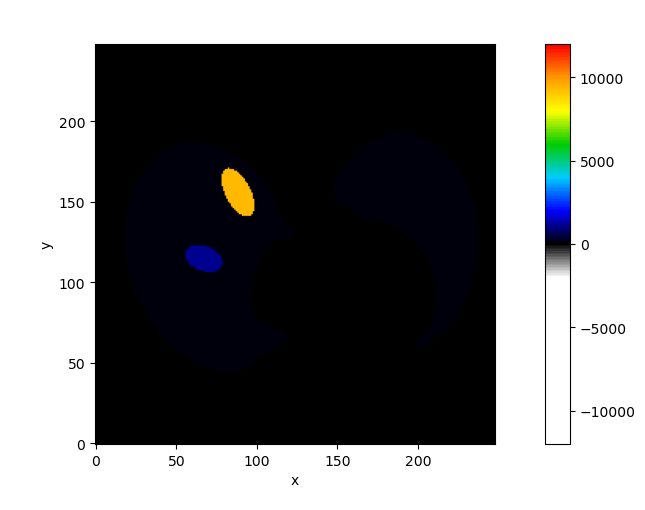

interactive(children=(SelectionSlider(description='z', options=((0.0, 0), (2.5, 1), (5.0, 2), (7.5, 3), (10.0,…

displacement


<IPython.core.display.Javascript object>


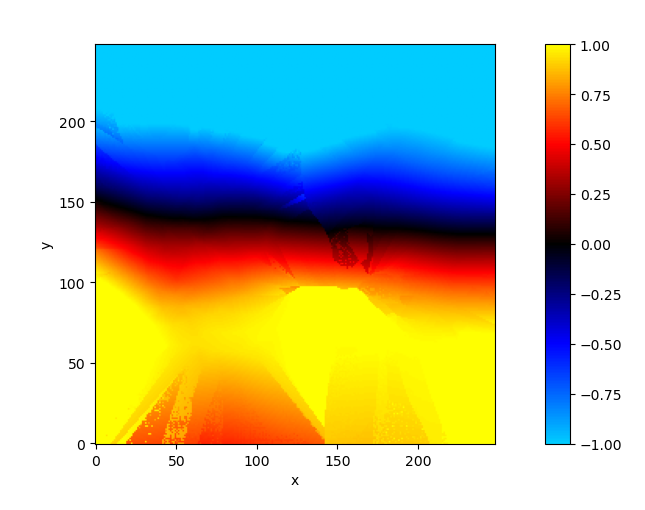

interactive(children=(SelectionSlider(description='z', options=((0.0, 0), (2.5, 1), (5.0, 2), (7.5, 3), (10.0,…

In [10]:
ps = project.phantom.PhantomSet(f'../data/phantom_lung_1000', 100)
p = ps[4]
p.load_niftis()
p.load_mesh(10)

xview = project.visual.XArrayViewer
xview(p.anat)
xview(p.elast)
xview(p.disp)
p.mesh

In [ ]:
%autoreload

for bias_range in [250, 0]:
    print(f'GENERATING PHANTOMS WITH BIAS RANGE {bias_range}')
    ps = project.phantom.PhantomSet(
        data_root=f'../data/phantom_lung_{bias_range}',
        num_phantoms=100
    )
    ps.generate(
        mask_file='../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T00/lung_regions.nii.gz',
        mesh_radius=10,
        bias_range=bias_range
    )

GENERATING PHANTOMS WITH BIAS RANGE 250
Setting random seed to 0
Defining spatial domain...
5 14
Sampling latent variables...
Generating stiffness map..
Generating anatomical image...
Generating displacement BC...


Loading ../data/phantom_lung_1000/phantom2/phantom2_anat.nii.gz
Loading ../data/phantom_lung_1000/phantom2/phantom2_elast.nii.gz
Loading ../data/phantom_lung_1000/phantom2/phantom2_disp.nii.gz
Loading ../data/phantom_lung_1000/phantom2/phantom2_mask.nii.gz
Loading ../data/phantom_lung_1000/phantom2/phantom2_mesh10.xdmf
Loading ../data/phantom_lung_1000/phantom2/phantom2_mesh10.xdmf... 5164
CT


<IPython.core.display.Javascript object>


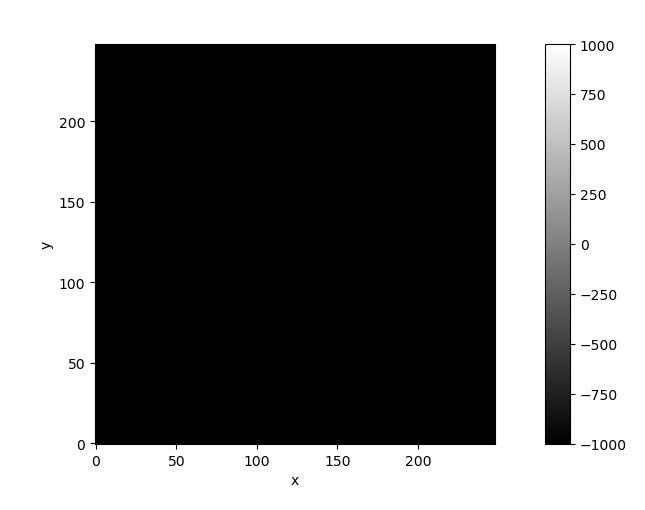

interactive(children=(SelectionSlider(description='z', options=((0.0, 0), (2.5, 1), (5.0, 2), (7.5, 3), (10.0,…

elasticity


<IPython.core.display.Javascript object>


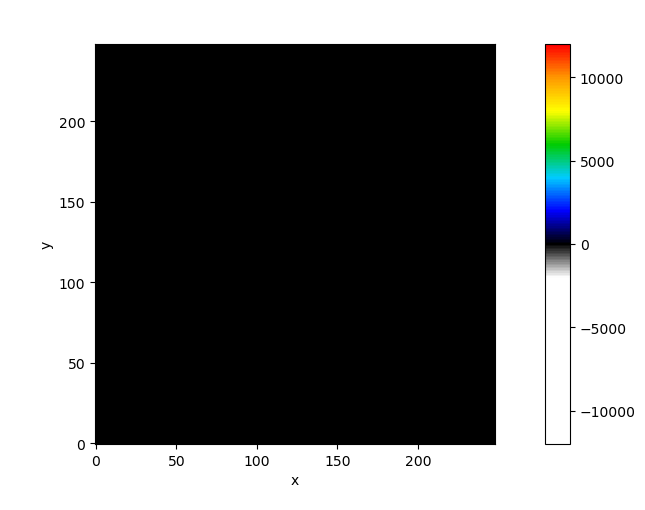

interactive(children=(SelectionSlider(description='z', options=((0.0, 0), (2.5, 1), (5.0, 2), (7.5, 3), (10.0,…

displacement


<IPython.core.display.Javascript object>


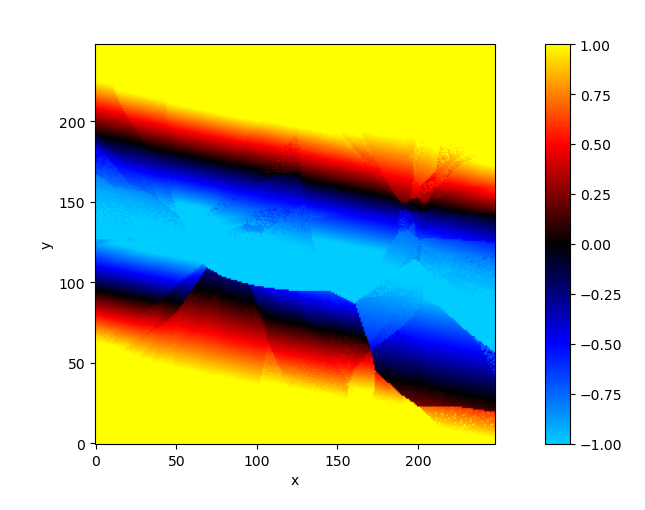

interactive(children=(SelectionSlider(description='z', options=((0.0, 0), (2.5, 1), (5.0, 2), (7.5, 3), (10.0,…

In [7]:
p = ps.phantoms[2]
p.load_niftis()
p.load_mesh(10)
project.visual.XArrayViewer(p.anat)
project.visual.XArrayViewer(p.elast)
project.visual.XArrayViewer(p.disp)
p.mesh